# Example NoteGraph 

Displays an example graph of notes

In [15]:
from vault_manager import NoteGraph, Note
import os
import networkx as nx 
import matplotlib.cm as cm

import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()
vaultroot = os.environ.get('VAULT_PATH')

In [3]:
n = NoteGraph(vaultroot)
n.is_directed = False

# Display the graph

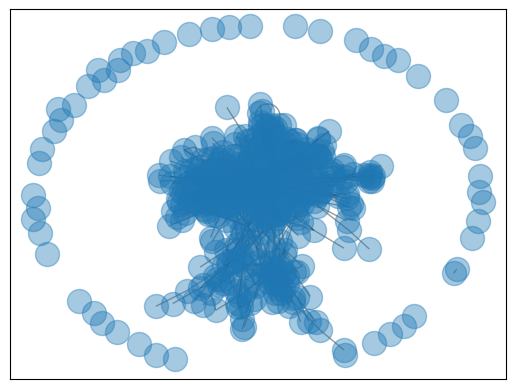

In [4]:
nx.draw_networkx(n.graph, with_labels=False,alpha = 0.4)

# Finding Louvain communities

In [27]:
c = nx.community.louvain_communities(n.graph)


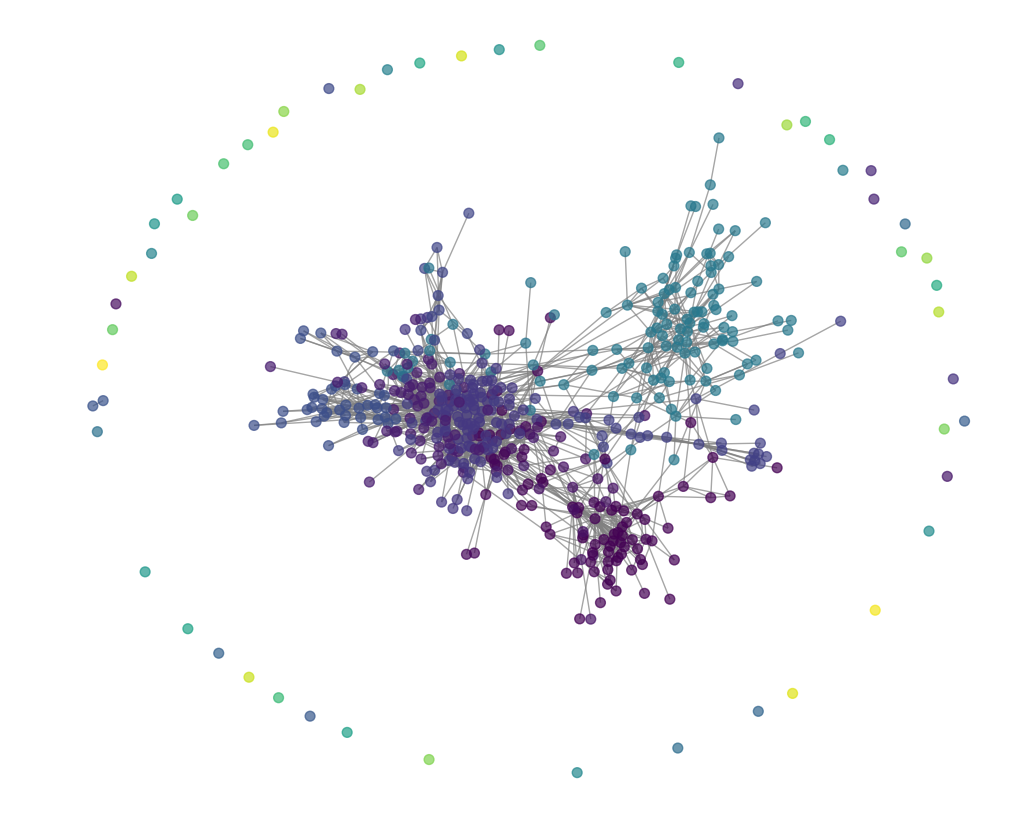

In [28]:
n_communities = len(c)

if n_communities <= 10:
    cmap = plt.cm.tab10
elif n_communities <= 20:
    cmap = plt.cm.tab20
else:
    # For more than 20 communities, use a continuous colormap
    cmap = plt.cm.viridis
    
G = n.graph
community_dict = {}
for i, community in enumerate(c):
    for node in community:
        community_dict[node] = i
node_colors = [community_dict[node] for node in G.nodes()]
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, 
        node_color=node_colors, 
        node_size=50, 
        with_labels=False,
        edge_color='gray', 
        alpha=0.7,
        cmap=cmap)
